In [38]:
raw_data <- read.csv("Data_SSL_PSM_WITHOUT_RAT_AGE_0_30.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 150348

In [39]:
# Checking the Missing Values 
sapply(raw_data,function(x) sum(is.na(x)))

PRE_RAW_HEAT_SCORE          AGE_GROUP             AGE_TO           AGE_CURR 
                 0                  0                  0                  0 
       LATEST_DIST    LATEST_DIST_RES             DRUG_I           WEAPON_I 
                 0                  0                  0                  0 
      RACE_CODE_CD        SEX_CODE_CD       CPD_ARREST_I        LATEST_DATE 
                 0                  0                  0                  0

In [40]:
complete_data <- raw_data[complete.cases(raw_data),]
cat("After removing the incomplete rows, the number of rows are", nrow(complete_data))

After removing the incomplete rows, the number of rows are 150348

In [41]:
complete_data

PRE_RAW_HEAT_SCORE,AGE_GROUP,AGE_TO,AGE_CURR,LATEST_DIST,LATEST_DIST_RES,DRUG_I,WEAPON_I,RACE_CODE_CD,SEX_CODE_CD,CPD_ARREST_I,LATEST_DATE
14196,20-30,20-30,20-30,31,31,N,Y,0,M,N,2015
14511,20-30,20-30,20-30,31,8,N,N,1,M,N,2016
12982,less than 20,less than 20,less than 20,31,8,N,N,1,M,N,2016
13110,less than 20,less than 20,less than 20,31,4,N,Y,0,M,Y,2016
12874,less than 20,less than 20,less than 20,31,31,N,Y,0,M,N,2016
13535,less than 20,less than 20,20-30,31,2,N,Y,0,M,N,2015
12632,less than 20,less than 20,less than 20,31,31,N,N,0,M,N,2015
12620,less than 20,less than 20,less than 20,31,5,N,N,0,M,Y,2016
12586,less than 20,less than 20,less than 20,31,2,N,Y,0,M,N,2016
12476,less than 20,less than 20,20-30,31,14,Y,Y,0,M,N,2016


In [42]:
#sub_set_complete_data<-complete_data[(complete_data$RACE_CODE_CD == "BLK") | (complete_data$RACE_CODE_CD == "WHI"),]

In [43]:
#nrow(sub_set_complete_data)

In [44]:
# Converting the categorical variables into factors
complete_data$AGE_GROUP <- as.factor(complete_data$AGE_GROUP)
complete_data$AGE_CURR<- as.factor(complete_data$AGE_CURR)
complete_data$LATEST_DIST<- as.factor(complete_data$LATEST_DIST)
complete_data$LATEST_DIST_RES<- as.factor(complete_data$LATEST_DIST_RES)
complete_data$DRUG_I<- as.factor(complete_data$DRUG_I)
complete_data$WEAPON_I<- as.factor(complete_data$WEAPON_I)
complete_data$RACE_CODE_CD<- as.factor(complete_data$RACE_CODE_CD) 
complete_data$SEX_CODE_CD<- as.factor(complete_data$SEX_CODE_CD)
complete_data$CPD_ARREST_I<- as.factor(complete_data$CPD_ARREST_I)
complete_data$LATEST_DATE<- as.factor(complete_data$LATEST_DATE)


In [45]:
m_ps_a <- glm(RACE_CODE_CD ~ AGE_GROUP  +  AGE_CURR + 
            LATEST_DIST + LATEST_DIST_RES + DRUG_I + WEAPON_I +SEX_CODE_CD+CPD_ARREST_I+LATEST_DATE,            
            family = binomial(), data = complete_data)
summary(m_ps_a)


Call:
glm(formula = RACE_CODE_CD ~ AGE_GROUP + AGE_CURR + LATEST_DIST + 
    LATEST_DIST_RES + DRUG_I + WEAPON_I + SEX_CODE_CD + CPD_ARREST_I + 
    LATEST_DATE, family = binomial(), data = complete_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7216  -0.7626  -0.1508   0.7287   4.0051  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.511443   0.201385  -2.540 0.011097 *  
AGE_GROUPless than 20 -0.110143   0.021005  -5.244 1.57e-07 ***
AGE_CURR30-40          0.134562   0.021690   6.204 5.51e-10 ***
AGE_CURR40-50         -1.043951   1.207952  -0.864 0.387461    
AGE_CURRless than 20  -0.327546   0.026564 -12.331  < 2e-16 ***
LATEST_DIST2          -2.099314   0.125680 -16.704  < 2e-16 ***
LATEST_DIST3          -2.959737   0.154518 -19.155  < 2e-16 ***
LATEST_DIST4          -1.457671   0.087971 -16.570  < 2e-16 ***
LATEST_DIST5          -2.354185   0.108110 -21.776  < 2e-16 ***
LATEST_DIST6          -2.

In [46]:
prs_df_a <- data.frame(pr_score = predict(m_ps_a, type = "response"),
                     RACE_CODE_CD = m_ps_a$model$RACE_CODE_CD)
head(prs_df_a)

pr_score,RACE_CODE_CD
0.156990402,0
0.345410208,1
0.254080880,1
0.004973333,0
0.091059898,0
0.010420118,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


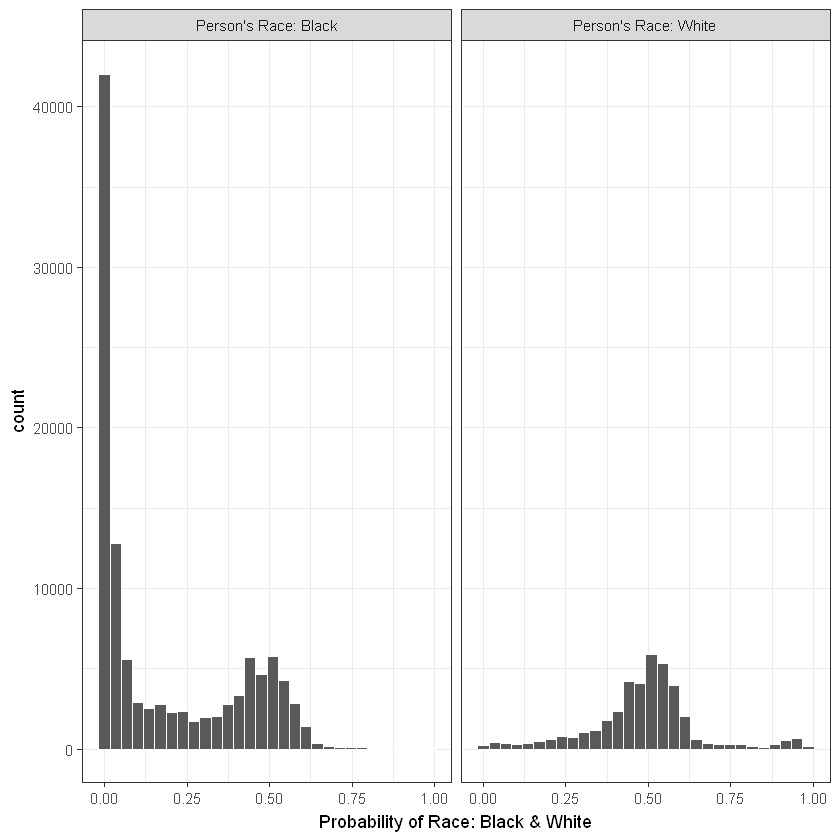

In [47]:
library(dplyr)
library(ggplot2)
labs <- paste("Person's Race:", c("Black", "White"))
prs_df_a %>%
  mutate(RACE_CODE_CD = ifelse(RACE_CODE_CD == 0, labs[1], labs[2])) %>%
  ggplot(aes(x = pr_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~RACE_CODE_CD) +
  xlab("Probability of Race: Black & White") +
  theme_bw()

In [48]:
library(MatchIt )

In [49]:
m.out = matchit(RACE_CODE_CD~ AGE_GROUP + AGE_CURR+LATEST_DIST+LATEST_DIST_RES+DRUG_I+WEAPON_I+
                  SEX_CODE_CD+CPD_ARREST_I+LATEST_DATE,
                data = complete_data, method = "nearest",
                ratio = 1)

In [50]:
m.out


Call: 
matchit(formula = RACE_CODE_CD ~ AGE_GROUP + AGE_CURR + LATEST_DIST + 
    LATEST_DIST_RES + DRUG_I + WEAPON_I + SEX_CODE_CD + CPD_ARREST_I + 
    LATEST_DATE, data = complete_data, method = "nearest", ratio = 1)

Sample sizes:
          Control Treated
All        110657   39691
Matched     39691   39691
Unmatched   70966       0
Discarded       0       0


[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

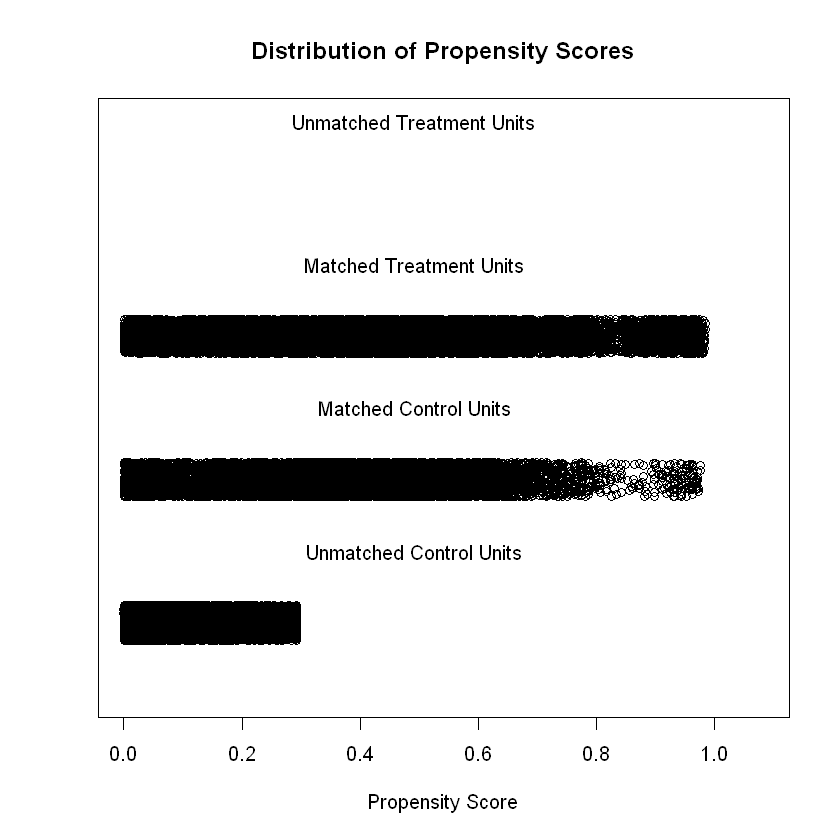

In [51]:
plot(m.out, type = "jitter")

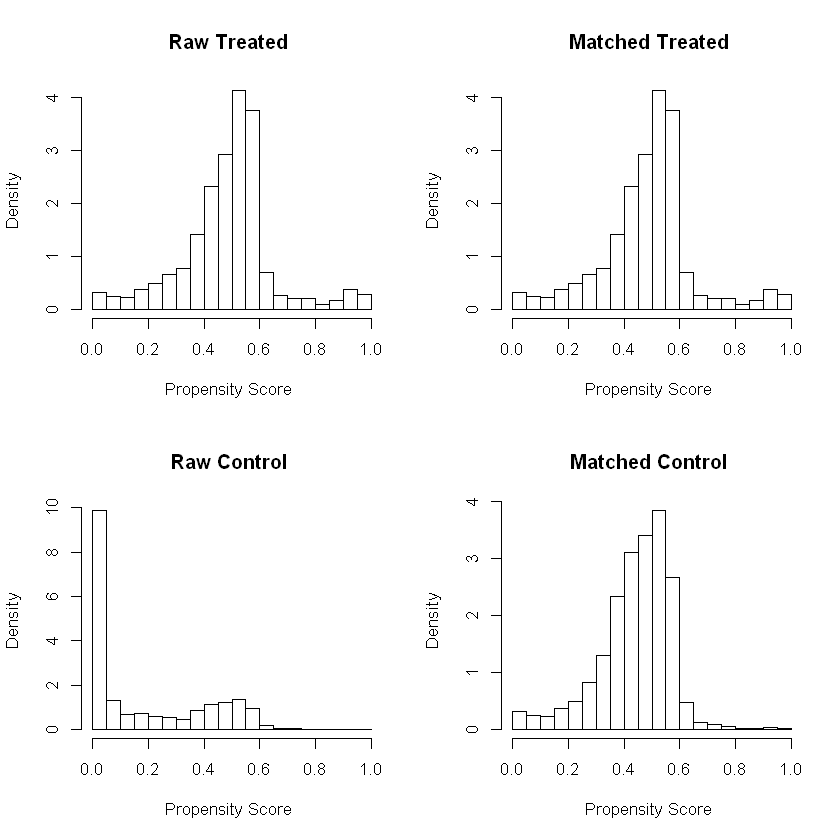

In [52]:
plot(m.out, type = "hist")

In [53]:
dta_m_1 <- match.data((m.out))
dim(dta_m_1)

[1] 79382    14

In [54]:
matched_1 <- match.data(m.out)
matched_copy_1<-matched_1

The following objects are masked from matched_1 (pos = 3):

    AGE_CURR, AGE_GROUP, AGE_TO, CPD_ARREST_I, distance, DRUG_I,
    LATEST_DATE, LATEST_DIST, LATEST_DIST_RES, PRE_RAW_HEAT_SCORE,
    RACE_CODE_CD, SEX_CODE_CD, WEAPON_I, weights

The following objects are masked from matched_1 (pos = 4):

    AGE_CURR, AGE_GROUP, AGE_TO, CPD_ARREST_I, distance, DRUG_I,
    LATEST_DATE, LATEST_DIST, LATEST_DIST_RES, PRE_RAW_HEAT_SCORE,
    RACE_CODE_CD, SEX_CODE_CD, WEAPON_I, weights



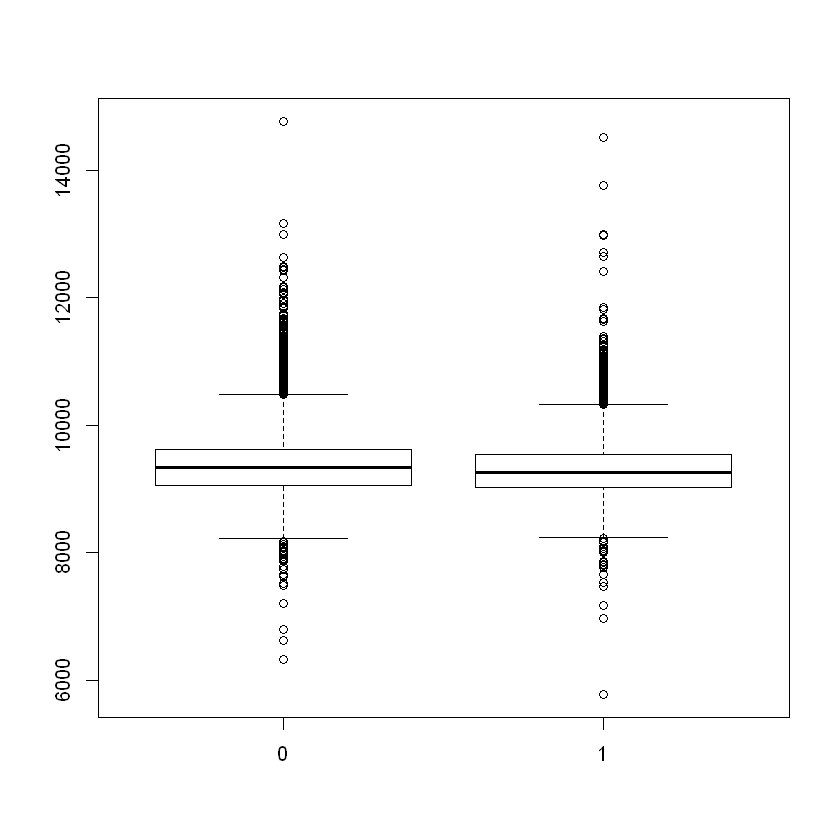

In [55]:
# Doing T - test on matched records
attach(matched_1)
boxplot(PRE_RAW_HEAT_SCORE~RACE_CODE_CD)

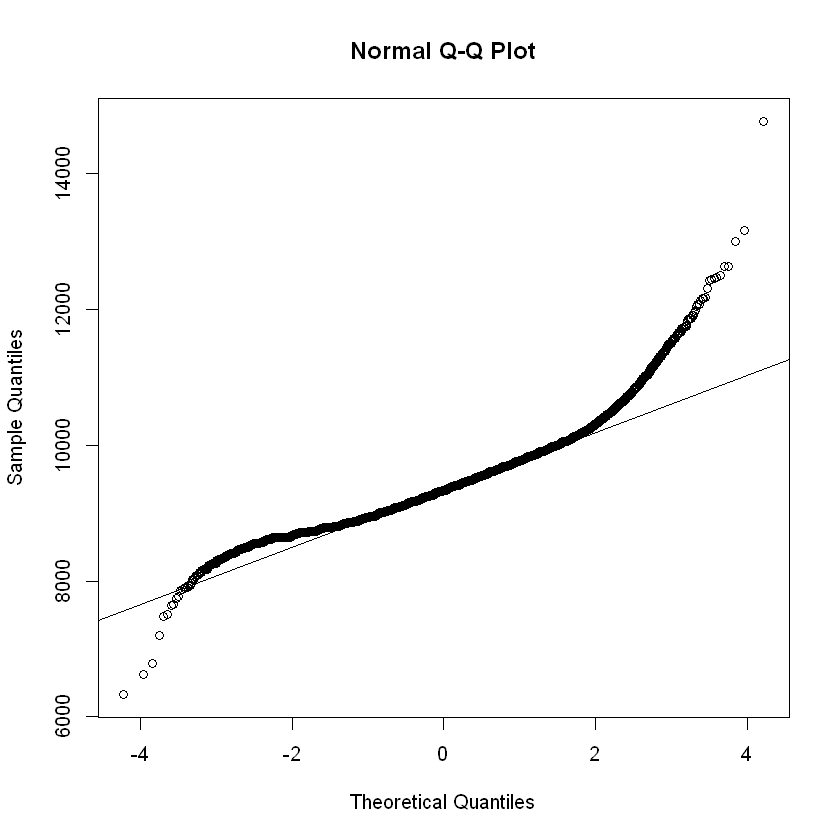

In [56]:
race_black <-subset(matched_1,RACE_CODE_CD == 0)
race_white<-subset(matched_1,RACE_CODE_CD == 1)
# Normal QQ Plot for RACE == BLACK
qqnorm(race_black$PRE_RAW_HEAT_SCORE)
qqline(race_black$PRE_RAW_HEAT_SCORE)

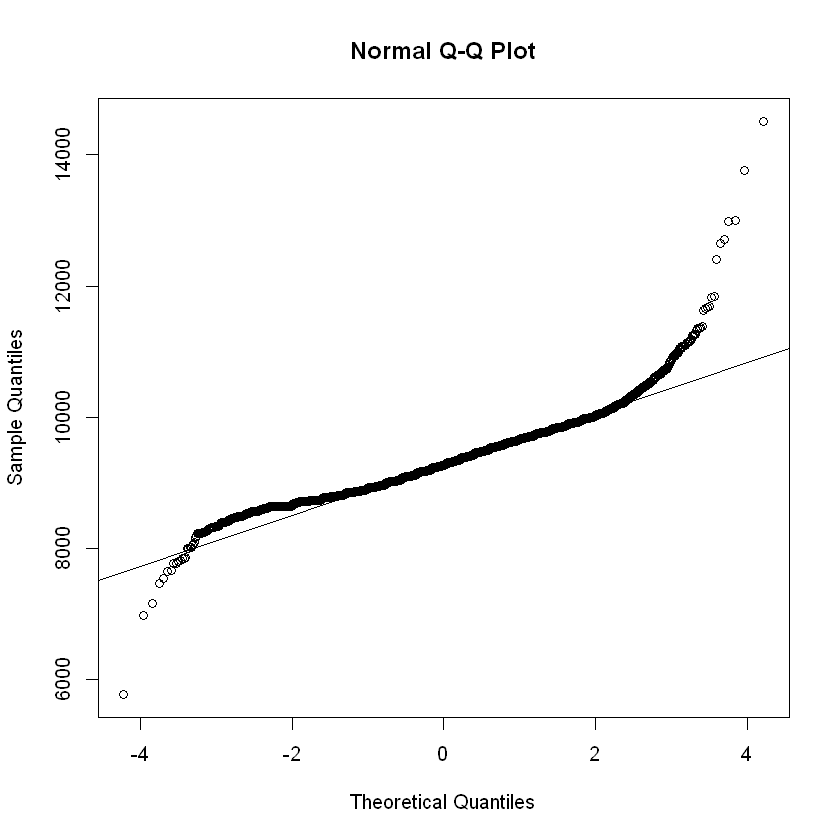

In [57]:
# Normal QQ Plot for RACE == WHITE
qqnorm(race_white$PRE_RAW_HEAT_SCORE)
qqline(race_white$PRE_RAW_HEAT_SCORE)

In [58]:
t.test(PRE_RAW_HEAT_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  PRE_RAW_HEAT_SCORE by RACE_CODE_CD
t = 26.224, df = 77506, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 69.45958 80.68101
sample estimates:
mean in group 0 mean in group 1 
       9367.652        9292.581 
